In [453]:
import numpy as np
import pandas as pd
import readability
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import wordcloud

In [454]:
train_data = pd.read_csv('kaggle_data/train.csv')
test_data = pd.read_csv('kaggle_data/test.csv')
sample = pd.read_csv('kaggle_data/sample_submission.csv')


target = train_data.target.to_numpy()

def rmse_score(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))

train_data.head()

id url_legal license  \
0  c12129c31       NaN     NaN   
1  85aa80a4c       NaN     NaN   
2  b69ac6792       NaN     NaN   
3  dd1000b26       NaN     NaN   
4  37c1b32fb       NaN     NaN   

                                             excerpt    target  standard_error  
0  When the young people returned to the ballroom... -0.340259        0.464009  
1  All through dinner time, Mrs. Fayre was somewh... -0.315372        0.480805  
2  As Roger had predicted, the snow departed as q... -0.580118        0.476676  
3  And outside before the palace a great garden w... -1.054013        0.450007  
4  Once upon a time there were Three Bears who li...  0.247197        0.510845

In [455]:
from nltk.corpus import stopwords
import spacy
stopwords.words('english')
nlp = spacy.load('en_core_web_sm')
sw = set(nlp.Defaults.stop_words)

In [456]:
from collections import Counter
freq = Counter(' '.join(train_data['excerpt']).lower().split())
tmp_f = dict(freq)
for f in tmp_f:
    if f in sw:del freq[f]
freq_dict = dict(sorted(freq.items(), key=lambda x:x[1], reverse=True)[0:200])
result = {
    '單字':freq_dict.keys(),
    '頻率':freq_dict.values()
}

In [457]:
tmp_df = train_data.copy()
for s in tmp_df['excerpt']:
    for word in s:
        if word in sw:s.replace(word, '')

ImportError: The _imagingft C module is not installed

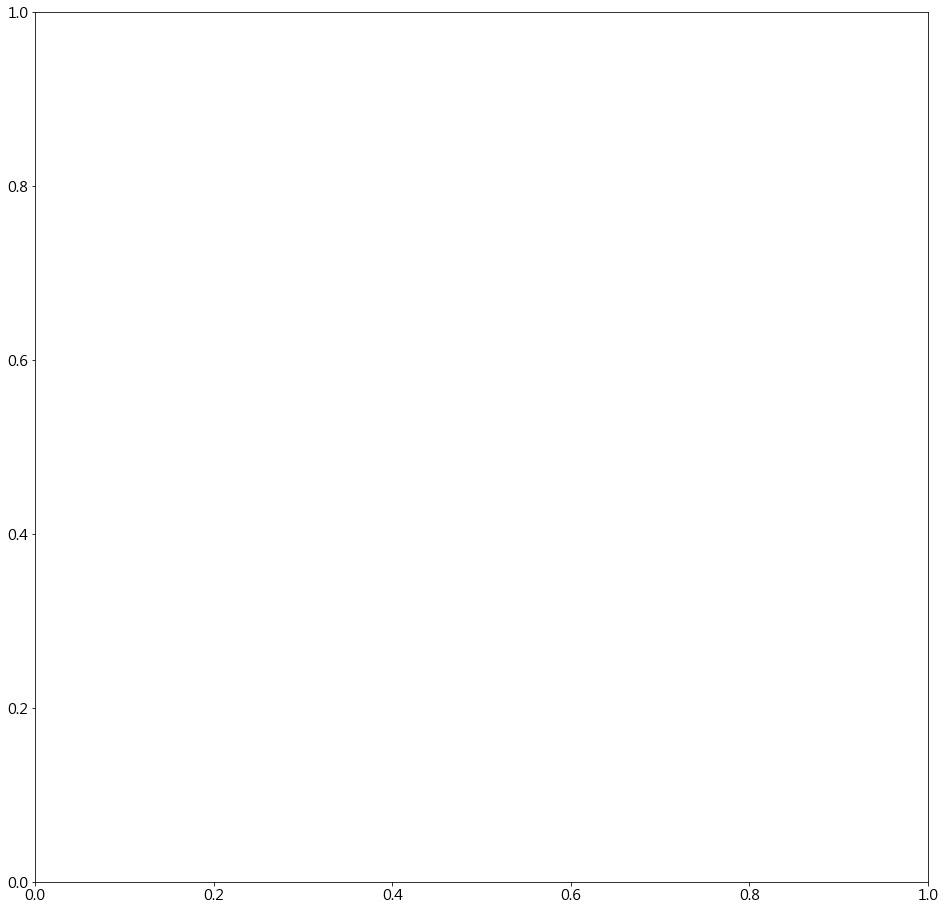

In [458]:
# color function for the wordcloud
def color_wc(word=None,font_size=None,position=None, orientation=None,font_path=None, random_state=None):
    h = int(360.0 * 150.0 / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(80, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

plt.subplots(figsize=(16,16))
wc = wordcloud.WordCloud(stopwords=wordcloud.STOPWORDS,background_color="white", contour_width=2, contour_color='blue',width=1500, height=750,color_func=color_wc,max_words=150, max_font_size=256,random_state=42)
wc.generate(' '.join(tmp_df['excerpt']))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [428]:
top_200_words = []
for sent in train_data['excerpt']:
    t = 0
    for w in sent.split():
        if w in list(freq_dict.keys()): t+=1
    top_200_words.append(t)
          

In [429]:
import readability
import textstat
read = {'wordtypes':[], 'syllables':[], 'FleschReadingEase':[], 'DaleChallIndex':[], 'complex_words':[], '#carriage returns':[], '#sentences':[], '#words':[]}
for sent in train_data['excerpt']:
    read_dict = readability.getmeasures(sent, lang='en')
    read['#words'].append(read_dict['sentence info']['words'])
    read['FleschReadingEase'].append(textstat.flesch_reading_ease(sent))
    read['DaleChallIndex'].append(textstat.dale_chall_readability_score(sent))
    read['complex_words'].append(textstat.difficult_words(sent))
    read['#sentences'].append(textstat.sentence_count(sent))
    read['#carriage returns'].append(read_dict['sentence info']['sentences'])
    read['syllables'].append(read_dict['sentence info']['syllables'])
    read['wordtypes'].append(read_dict['sentence info']['wordtypes'])
read['top200'] = top_200_words

In [430]:
readability_dict = readability.getmeasures(train_data['excerpt'][0], lang='en')
readability_dict

OrderedDict([('readability grades',
              OrderedDict([('Kincaid', 10.613715083798883),
                           ('ARI', 14.24750465549348),
                           ('Coleman-Liau', 9.124775659217878),
                           ('FleschReadingEase', 72.10388733705774),
                           ('GunningFogIndex', 15.732216014897581),
                           ('LIX', 47.71042830540037),
                           ('SMOGIndex', 12.219544457292887),
                           ('RIX', 5.333333333333333),
                           ('DaleChallIndex', 8.821149534450651)])),
             ('sentence info',
              OrderedDict([('characters_per_word', 4.407821229050279),
                           ('syll_per_word', 1.23463687150838),
                           ('words_per_sentence', 29.833333333333332),
                           ('sentences_per_paragraph', 6.0),
                           ('type_token_ratio', 0.6089385474860335),
                           ('characters'

In [431]:
import textstat
textstat.sentence_count(train_data['excerpt'][0])
#dir(textstat)

11

In [432]:
df = train_data.copy()
cols = read.keys()
df.pop('url_legal')
df.pop('license')
for col in cols:
    df.insert(4, col, pd.Series(read[col]))  # 調整欄位順序用


num_bins = int(np.floor(1 + np.log2(len(train_data))))
print(num_bins)
#df.loc[:,'bins'] = pd.cut(df['target'],bins=5, labels=False)
#df.drop(columns=['url_legal', 'license'])
df.head()

12


id                                            excerpt    target  \
0  c12129c31  When the young people returned to the ballroom... -0.340259   
1  85aa80a4c  All through dinner time, Mrs. Fayre was somewh... -0.315372   
2  b69ac6792  As Roger had predicted, the snow departed as q... -0.580118   
3  dd1000b26  And outside before the palace a great garden w... -1.054013   
4  37c1b32fb  Once upon a time there were Three Bears who li...  0.247197   

   standard_error  top200  #words  #sentences  #carriage returns  \
0        0.464009      14     179          11                  6   
1        0.480805      17     172          12                  6   
2        0.476676      11     170           8                  5   
3        0.450007      12     164           5                  2   
4        0.510845       9     147           5                  1   

   complex_words  DaleChallIndex  FleschReadingEase  syllables  wordtypes  
0             25            6.65              80.31        221        109  
1             17            5.92              82.54        206        116  
2             17            6.29              75.74        206        121  
3             14            6.61              72.02        195        110  
4              1            1.57              75.47        151         48

<AxesSubplot:>

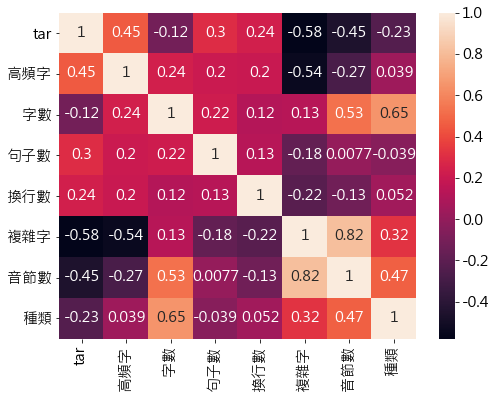

In [433]:
import seaborn as sns
plt.rcParams['font.family'] = 'Microsoft JhengHei'
X = df.copy()
X = X.drop(['id','excerpt', 'standard_error', 'DaleChallIndex', 'FleschReadingEase'], axis=1)
X.columns = ['tar', '高頻字', '字數', '句子數', '換行數', '複雜字', '音節數', '種類']
cor = X.corr()
plt.rcParams['font.size'] = 15
plt.rcParams["figure.figsize"] = (8, 6)
sns.heatmap(cor, annot=True)

In [300]:
import matplotlib
print(matplotlib.matplotlib_fname())

C:\Users\islab\Anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc


In [409]:
fig = px.scatter_matrix(X, dimensions=['tar', '高頻字', '字數', '句子數', '換行數', '複雜字', '音節數', '種類'])
fig.update_traces(showupperhalf=False)
fig.show()

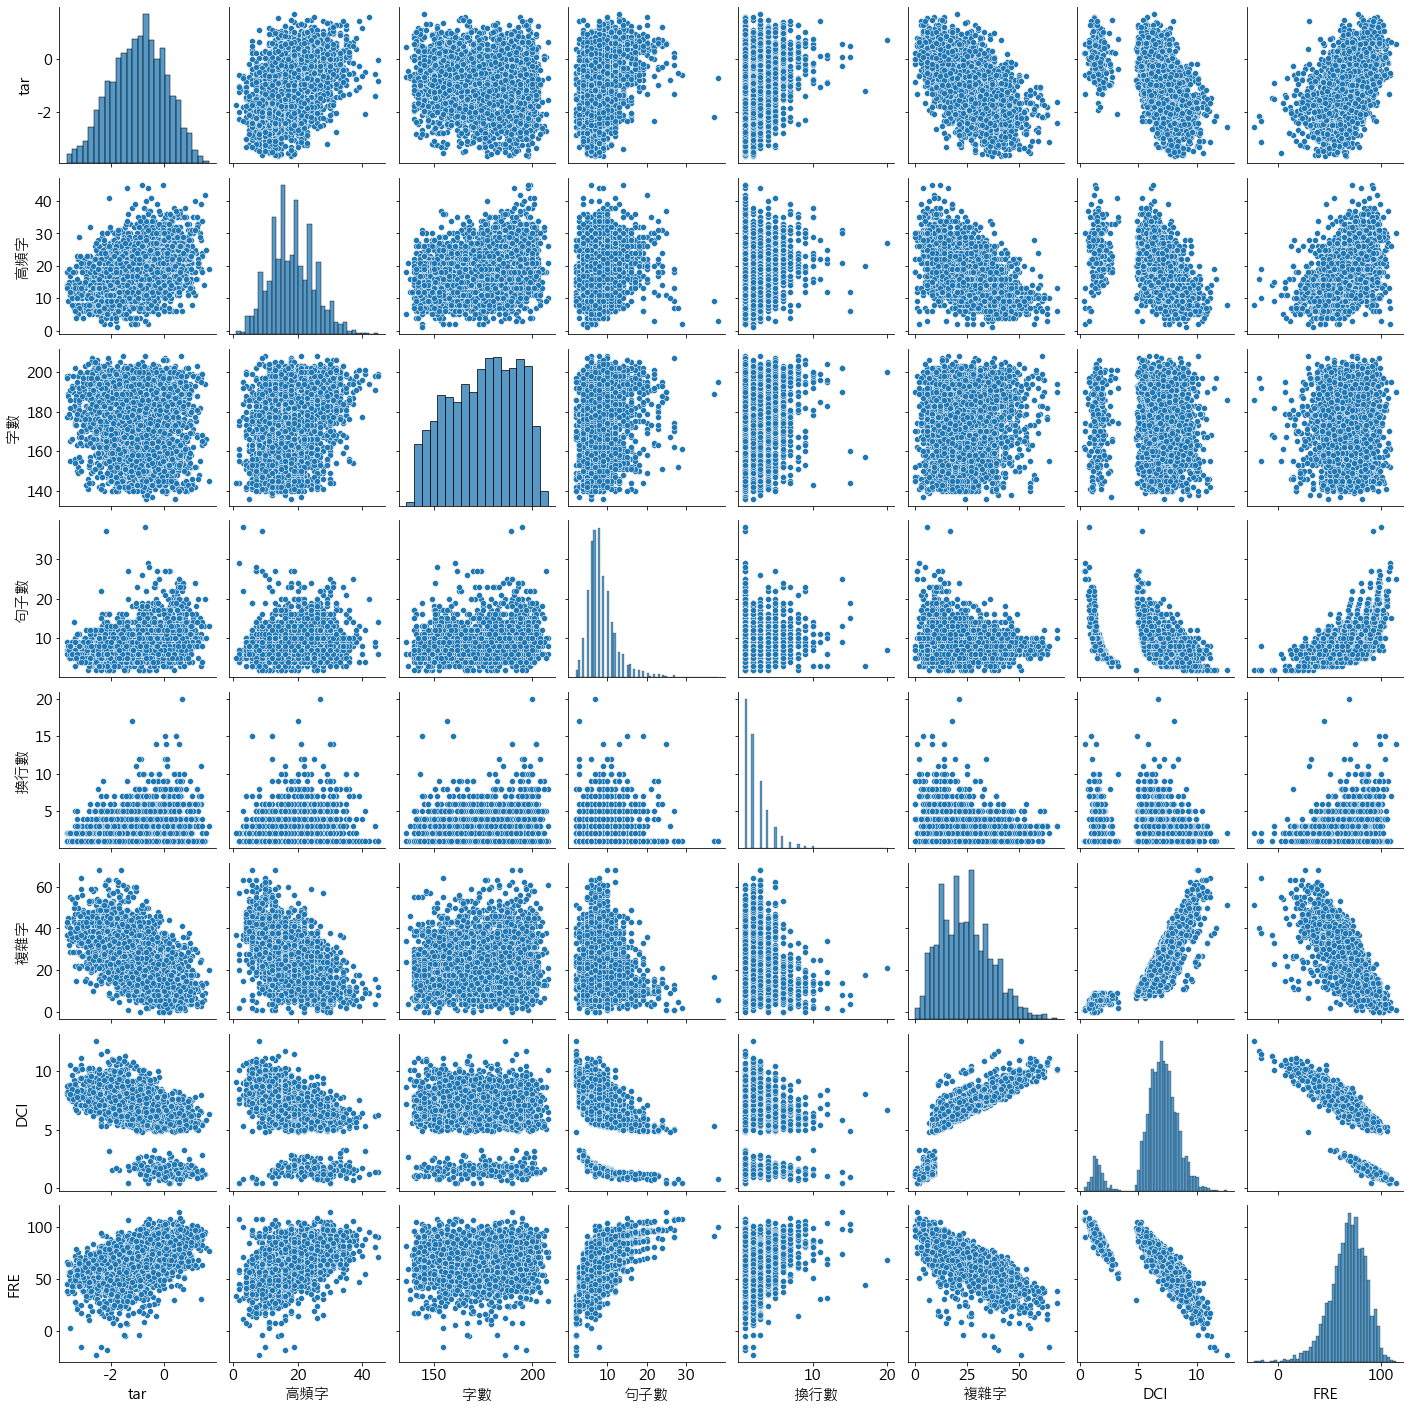

In [364]:
plt.rcParams['font.family'] = 'Microsoft JhengHei'
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['font.size'] = 15
sns.pairplot(X)

In [240]:
fig = px.histogram(df, x="target", marginal="box")
fig.show()

In [365]:
fig = px.histogram(df, x="standard_error", marginal="box")
fig.show()

In [242]:
fig = px.histogram(df, x="#words", marginal="box")
fig.show()

# Dale-Chall Readability socre

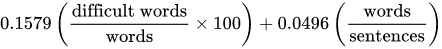

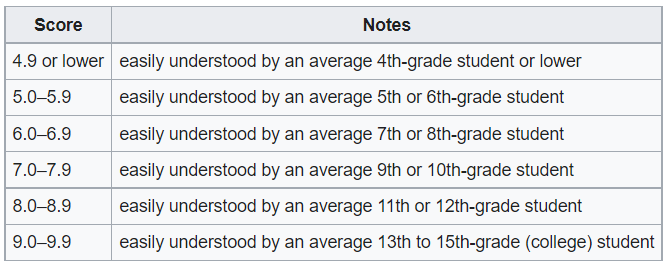

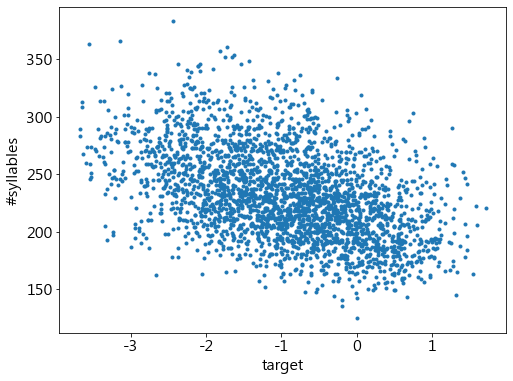

In [435]:
target, syllables = df['target'], df['syllables'] 
plt.xlabel('target')
plt.ylabel('#syllables')
plt.scatter(target, syllables, marker='.')
plt.show()

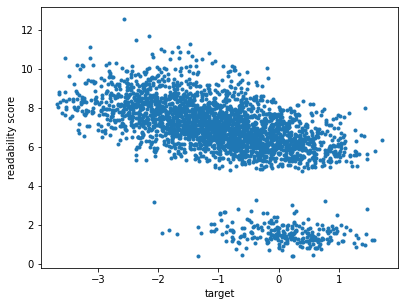

In [245]:
target, DaleChallIndex = df['target'], df['DaleChallIndex'] 
plt.xlabel('target')
plt.ylabel('readability score')
plt.scatter(target, DaleChallIndex, marker='.')
plt.show()

# Flesch Reading Ease Score
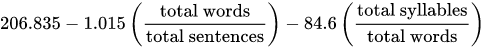

The following table can be helpful to assess the ease of readability in a document.
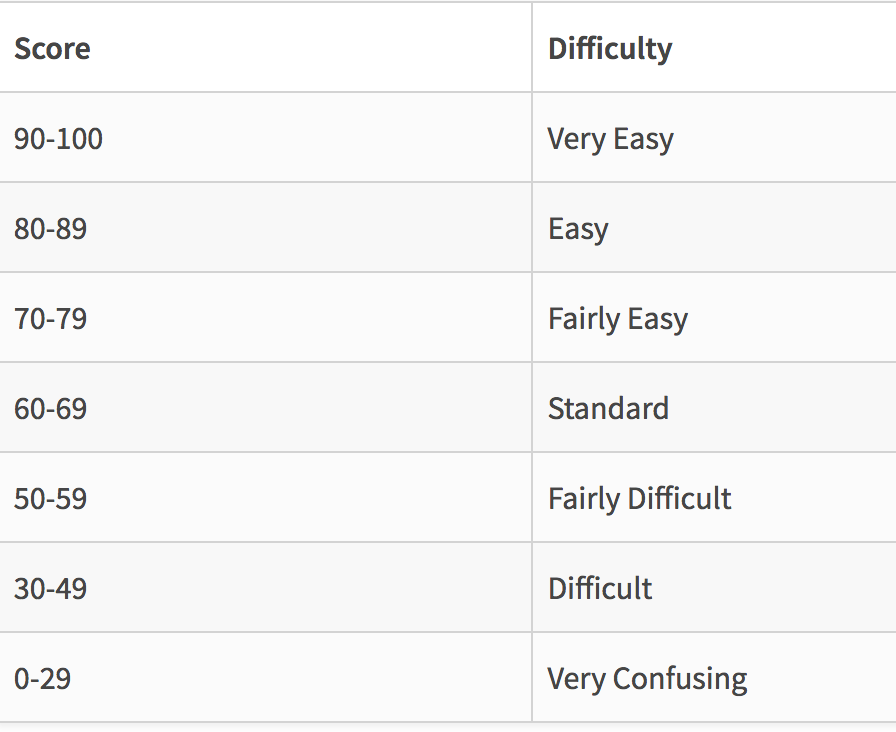

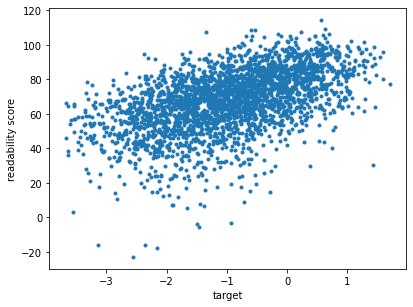

In [246]:
target, FleschReadingEase = df['target'], df['FleschReadingEase']  
plt.xlabel('target')
plt.ylabel('readability score')
plt.scatter(target, FleschReadingEase, marker='.')
plt.show()

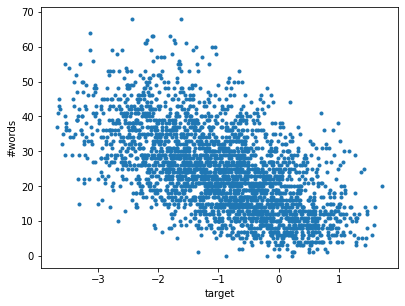

In [255]:
target, complex_words = df['target'], df['complex_words']
plt.xlabel('target')
plt.ylabel('#words')
plt.scatter(target, complex_words, marker='.')
plt.show()

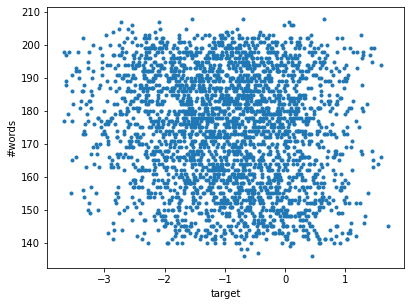

In [247]:
target, words = df['target'], df['#words'] 
plt.xlabel('target')
plt.ylabel('#words')
plt.scatter(target, words, marker='.')
plt.show()

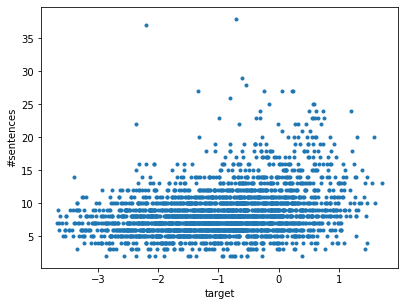

In [248]:
target, sentences = df['target'], df['#sentences'] 
plt.xlabel('target')
plt.ylabel('#sentences')
plt.scatter(target, sentences, marker='.')
plt.show()

In [423]:
target, top20 = df['target'], df['top200'] 
plt.rcParams["figure.figsize"] = (6.4, 4.8)
plt.rcParams['font.size'] = 10
plt.xlabel('target')
plt.ylabel('#words')
plt.scatter(target, top20, marker='.')
plt.show()

KeyError: 'top200'

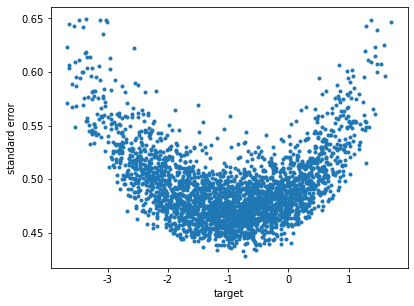

In [426]:
target, standard_error = train_data['target'], train_data['standard_error'] 
plt.rcParams["figure.figsize"] = (6.4, 4.8)
plt.rcParams['font.size'] = 10
plt.scatter(target[target != 0], standard_error[standard_error!=0], marker='.')
plt.xlabel('target')
plt.ylabel('standard error')
plt.show()

In [27]:
import textstat
test_data = train_data['excerpt'][0]
print(textstat.flesch_reading_ease(test_data))
print(textstat.flesch_kincaid_grade(test_data))
print(textstat.automated_readability_index(test_data))
print(textstat.dale_chall_readability_score(test_data))
print(textstat.difficult_words(test_data))
print(textstat.text_standard(test_data))

80.31
6.1
8.3
6.65
25
8th and 9th grade


In [3]:
max(train_data['target']), min(train_data['target']), max(train_data['standard_error']), min(train_data['standard_error'])

(1.7113898269999999, -3.676267773, 0.649671297, 0.0)

In [4]:
len(max(train_data['excerpt'], key=len)), len(min(train_data['excerpt'], key=len))

(1341, 669)

In [413]:
from nltk.corpus import stopwords
import spacy
stopwords.words('english')
nlp = spacy.load('en_core_web_sm')
sw = set(nlp.Defaults.stop_words)
print(sw)

{'becoming', 'therein', 'moreover', 'them', 'what', 'already', 'could', 'the', 'are', 'but', 'indeed', 'anywhere', 'more', 'whereas', 'please', 'ever', 'front', 'hundred', "'m", 'it', 'eight', 'regarding', 'no', 'nobody', 'above', 'again', 'otherwise', 'too', 'us', 'that', 'when', 'noone', 'put', 'five', 'rather', 'under', 'empty', 'same', 'beside', 'within', 'thence', 'toward', 'sixty', 'call', 'latter', 'which', 'should', 'beyond', 'can', 'therefore', 'anyhow', 'whereupon', 'whereafter', 'onto', 'many', 'nothing', 'yet', 'myself', 'who', 'very', 'either', 'with', 'been', 'or', 'always', 'whose', 'how', 'over', 'serious', 'fifty', 'both', 'nevertheless', 'still', 'one', 'those', 'much', 'per', 'their', 'our', 'would', 'himself', 'only', 'n’t', '’ve', 'by', 'whence', 'almost', 'beforehand', 'against', 'often', 'everyone', 'fifteen', 'in', 'him', 'neither', 'because', 'than', "n't", 'next', 'everywhere', 'whenever', 'unless', 'most', 'move', 'why', 'before', "'ve", 'however', 'yourselve

In [434]:
from collections import Counter
freq = Counter(' '.join(train_data['excerpt']).lower().split())
tmp_f = dict(freq)
for f in tmp_f:
    if f in sw:del freq[f]
freq_dict = dict(sorted(freq.items(), key=lambda x:x[1], reverse=True))
result = {
    '單字':freq_dict.keys(),
    '頻率':freq_dict.values()
}
pd.DataFrame(result) #應該統計文章中字的頻率與target的影響

單字    頻率
0              little  1092
1                like   759
2                said   727
3               great   661
4              people   611
...               ...   ...
50735     amphibians.     1
50736         crabs),     1
50737       jellyfish     1
50738      subgroups.     1
50739  invertebrates,     1

[50740 rows x 2 columns]

In [419]:
plt.rcParams['font.size'] = 15

In [416]:
plt.rcParams['font.family'] = '新細明體'

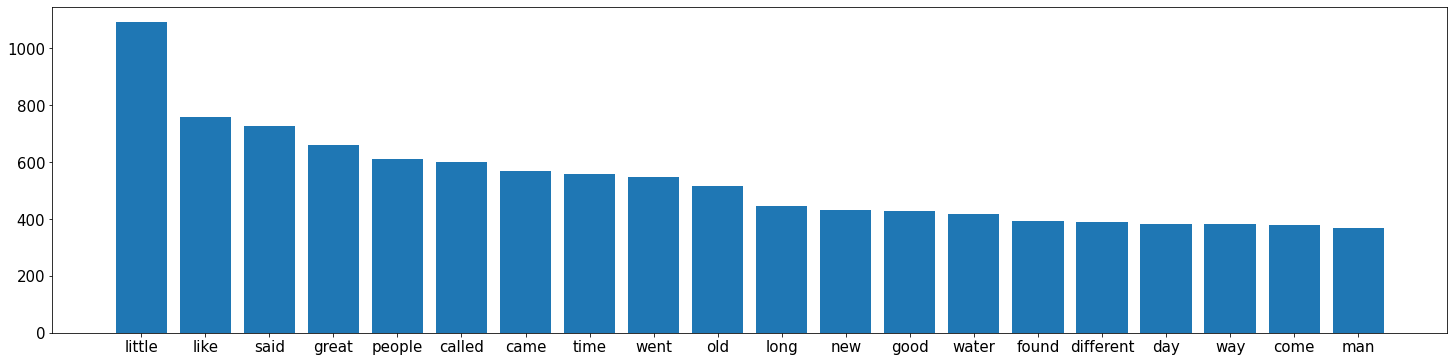

In [420]:
plt.rcParams["figure.figsize"] = (25, 6)
plt.bar(range(len(freq_dict)), list(freq_dict.values()), align='center')
plt.xticks(range(len(freq_dict)), list(freq_dict.keys()))
plt.show()

In [421]:
df = train_data.copy()

new_col = 'freq_word'
df.insert(4, new_col, pd.Series(freq_list))  # 調整欄位順序用
columns = df.columns.tolist()
#df[new_col] = df.excerpt.apply(lambda x: str(list(dict(sorted(Counter(x.lower().split()).items(), key=lambda x:x[1], reverse=True)[:10]).keys())).replace('[','').replace(']',''))
#df[new_col] = df.excerpt.apply(lambda x: str(list(dict(sorted(Counter(x.lower().split()).items(), key=lambda x:x[1], reverse=True)[:10]).keys())).replace('[','').replace(']',''))
df.sort_values('standard_error', ascending=False).reset_index().loc[:, columns[3:-1]].to_csv("train_with_freq_word.csv")
df.sort_values('standard_error', ascending=False).reset_index().loc[:, columns[3:-1]]

excerpt  \
0     On the basis of the preceding comparisons some...   
1     Fulldome refers to immersive dome-based video ...   
2     The question now is as to a criterion, by whic...   
3     Counting rhinos is hard work! Think of what wo...   
4     To study TBI, scientists often look at specifi...   
...                                                 ...   
2829  As they entered they saw Dorian Gray. He was s...   
2830  The Germans have made a routine of their attac...   
2831  The principal business of the people of this c...   
2832  It was characteristic of Tom Slade that he lik...   
2833  The sun was shining in a cloudless sky, and no...   

                                              freq_word    target  
0     [flood, babylonian, tradition, biblical, tigri... -3.355931  
1     [fulldome, dome, film, immersive, video, envir... -3.123762  
2     [priori., empirical, idea, if,, derived, absol... -3.473292  
3     [would, count, rhinos, birds, went, tried, aro...  1.367284  
4     [brain, tau, proteins, called, tbi,, biomarker... -3.031544  
...                                                 ...       ...  
2829  [lord, "you, "i, henry,, spoiled, one, entered... -0.537187  
2830  [germans, always, fire, trench, german, chimne... -1.188593  
2831  [fields, country, sweet, marjoram, holiday, da... -0.748452  
2832  [liked, scouts, tom, occasionally, woods., woo... -0.725055  
2833  [shadows, mountain, line, shadow, said, sun, s...  0.000000  

[2834 rows x 3 columns]

In [145]:
from functools import reduce
print(train_data.columns.tolist())
#train_data.loc[:,'freq_word'] = 
for data in train_data['excerpt']:
    freq = Counter(data.lower().split())
    freq_dict = dict(sorted(freq.items(), key=lambda x:x[1], reverse=True)[:10])
    print(freq_dict)



['id', 'url_legal', 'license', 'excerpt', 'target', 'standard_error']
{'the': 19, 'and': 9, 'was': 6, 'a': 5, 'of': 4, 'on': 4, 'were': 4, 'one': 4, 'to': 3, 'with': 3}
{'you': 8, 'to': 7, 'the': 6, 'i': 5, 'her': 4, 'she': 4, 'and': 4, 'dolly': 3, 'at': 3, 'mrs.': 2}
{'and': 9, 'the': 7, 'on': 4, 'as': 3, 'roger': 3, 'it': 3, 'was': 3, 'you': 3, 'a': 2, 'game': 2}
{'and': 15, 'the': 13, 'on': 4, 'his': 4, 'a': 3, 'all': 3, 'palace': 2, 'garden': 2, 'of': 2, 'through': 2}
{'a': 18, 'and': 10, 'the': 10, 'for': 10, 'bear;': 7, 'little,': 4, 'small,': 4, 'wee': 4, 'middle-sized': 4, 'great,': 4}
{'and': 9, 'to': 6, 'of': 6, 'the': 6, 'an': 5, 'general': 5, 'at': 5, 'hal': 3, 'was': 3, 'a': 3}
{'the': 16, 'in': 9, 'they': 8, 'of': 7, 'and': 6, 'had': 6, 'were': 4, 'to': 4, 'with': 3, 'been': 3}
{'the': 22, 'of': 13, 'to': 7, 'was': 5, 'a': 4, 'battle': 3, 'that': 3, 'as': 3, 'and': 3, 'automobile': 2}
{'the': 11, 'in': 6, 'and': 5, 'to': 5, 'they': 4, 'their': 2, 'long': 2, 'main': 2, 'bu

{'the': 22, 'and': 8, 'to': 5, 'in': 4, 'bear': 3, 'bird': 3, 'so': 3, 'is': 3, 'said': 3, 'must': 3}
{'the': 15, 'and': 9, 'he': 8, 'to': 6, 'as': 6, 'princess,': 4, 'him': 4, 'of': 4, 'me': 4, 'your': 3}
{'the': 13, 'of': 8, 'and': 6, 'a': 5, 'were': 5, 'in': 3, 'i': 2, 'those': 2, 'foxes': 2, 'for': 2}
{'the': 15, 'in': 8, 'was': 5, 'would': 4, 'to': 4, 'and': 4, 'at': 3, 'she': 3, 'were': 3, 'of': 3}
{'and': 10, 'i': 10, 'to': 8, 'of': 6, 'a': 6, 'them': 5, 'was': 4, 'the': 4, 'with': 4, 'as': 4}
{'of': 9, 'they': 9, 'the': 7, 'and': 7, 'them': 6, 'to': 5, 'their': 5, 'we': 3, 'or': 3, 'if': 3}
{'the': 12, 'his': 9, 'and': 8, 'was': 6, 'in': 6, 'of': 6, 'he': 6, 'to': 5, 'had': 4, 'prospero': 3}
{'and': 5, 'was': 4, 'a': 4, 'her': 4, 'the': 4, 'there': 3, 'going': 3, 'to': 3, 'with': 3, 'would': 3}
{'and': 12, 'the': 10, 'a': 5, 'little': 3, 'to': 3, 'then': 3, 'it': 3, 'she': 3, 'all': 2, 'was': 2}
{'of': 18, 'the': 17, 'a': 6, 'in': 6, 'and': 5, 'their': 3, 'as': 2, 'which': 2, '

{'the': 14, 'and': 13, 'to': 9, 'she': 8, 'a': 7, 'had': 6, 'of': 5, 'her': 4, 'was': 4, 'polly': 3}
{'the': 12, 'of': 5, 'to': 5, 'he': 4, 'and': 4, 'for': 3, 'that': 3, 'on': 3, 'a': 3, 'his': 3}
{'the': 14, 'i': 7, 'and': 5, 'of': 4, 'little': 3, 'a': 3, 'you': 3, 'so': 3, 'was': 2, 'into': 2}
{'the': 14, 'and': 8, 'of': 7, 'a': 6, 'at': 5, 'to': 4, 'it': 3, 'was': 3, 'in': 3, 'there': 3}
{'the': 11, 'in': 5, 'it': 5, 'of': 5, 'and': 5, 'up': 4, 'that': 4, 'was': 4, 'to': 4, 'a': 4}
{'and': 11, 'for': 7, 'to': 6, 'the': 6, 'a': 5, 'it': 4, 'was': 4, 'very': 4, 'but': 4, 'little': 3}
{'the': 15, 'and': 5, 'of': 5, 'for': 5, 'with': 4, 'been': 4, 'fire': 3, 'a': 3, 'had': 3, 'day': 3}
{'the': 15, 'of': 7, 'a': 5, 'to': 5, 'and': 4, 'as': 3, 'gate,': 3, 'she': 3, 'one': 2, 'in': 2}
{'the': 18, 'and': 10, 'to': 9, 'in': 5, 'a': 4, 'her': 4, 'of': 4, 'it': 4, 'would': 4, 'on': 3}
{'the': 14, 'to': 8, 'and': 6, 'in': 6, 'they': 6, 'a': 5, 'was': 4, 'it': 4, 'of': 3, 'as': 3}
{'and': 10, '

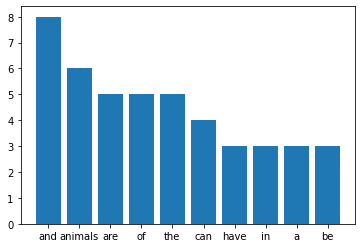

In [146]:
plt.bar(range(len(freq_dict)), list(freq_dict.values()), align='center')
plt.xticks(range(len(freq_dict)), list(freq_dict.keys()))
plt.show()